**Prevendo atrasos de voos**

Nosso case a ser analisado na aula de hoje é um dataset que contém algumas características sobre informações de voos.

Nosso foco basicamente consiste em prever se um determinado voo sofrerá atrasos, a partir da informação da partida programada.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando a base de dados
df = pd.read_csv("https://github.com/SandraRojasZ/Pos_Tech_Data_Analytics/blob/main/Base_de_Dados/airlines.csv?raw=true", sep=",")

In [5]:
# Analisando as primeiras linhas
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0


In [7]:
# Analisando linhas e colunas
df.shape

(539382, 8)

**Analisando a consistência dos dados**

Vamos validar se o dataset contém dados nulos e valores duplicados

In [10]:
# Analisando valores nulos
df.isnull().sum()

,0
Flight,0
Time,0
Length,0
Airline,0
AirportFrom,0
AirportTo,0
DayOfWeek,0
Class,0


In [11]:
# Limpando dados nulos
df = df.dropna()

In [13]:
# Verificando dados duplicados
duplicated_cols = []
for col in df.columns:
  if df[col].duplicated().any():
    duplicated_cols.append(col)

print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


**Análise exploratória dos dados**

Vamos construir uma análise inicial para conhecer os dados! Primeiramente, vamos aplicar a análise estatísticas descritiva dos dados e fazer algumas inferências sobre os dados.

In [14]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Vamos analisar o tempo do voo utilizando um gráfico de vilion em conjunto com boxplot:

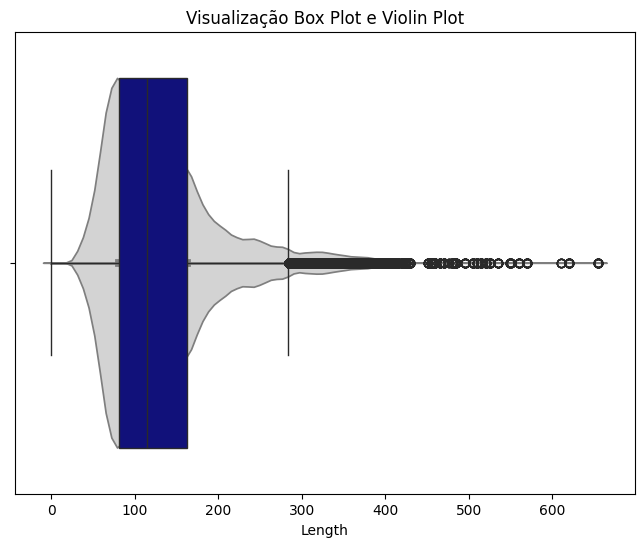

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show()

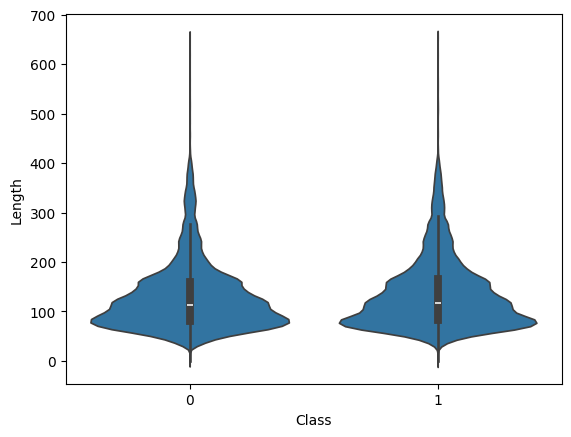

In [17]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()

In [18]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

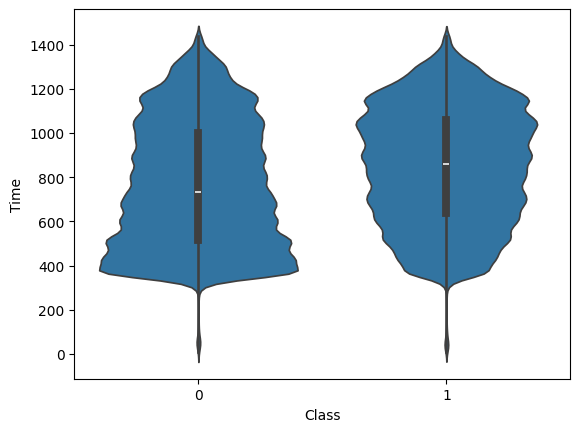

In [20]:
sns.violinplot(x='Class', y='Time', data=df)
plt.show()

<Axes: xlabel='Airline', ylabel='count'>

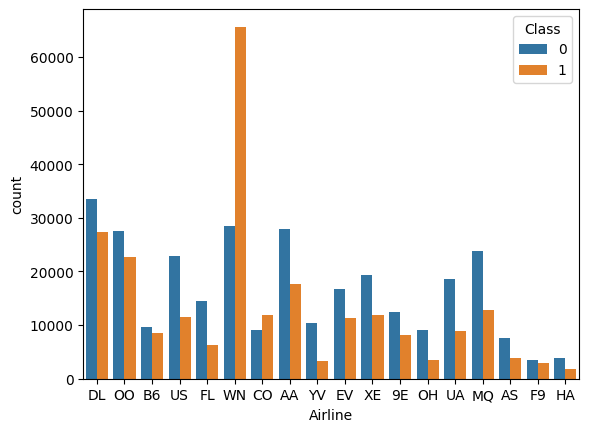

In [21]:
# Analisando as companhias x atrasos dos voos
sns.countplot(x='Airline', hue='Class', data=df)

<Axes: xlabel='DayOfWeek', ylabel='count'>

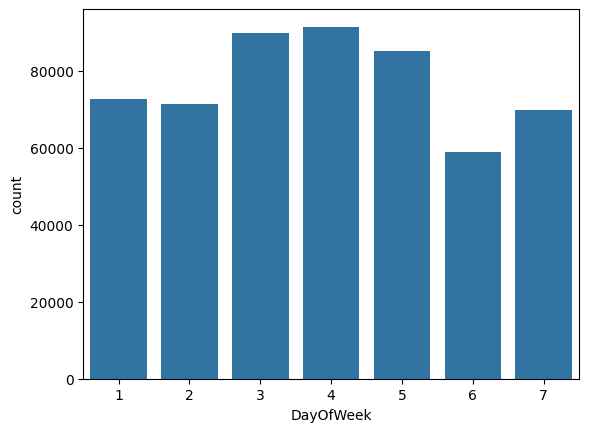

In [22]:
# Análise dos dias da semana que possuem maior concentração de atrasos
diaSemana = list(range(1,8))
sns.countplot(x='DayOfWeek',data=df, order=diaSemana)

# Mior concentração ocorre na quarta-feira

<Axes: xlabel='Class', ylabel='count'>

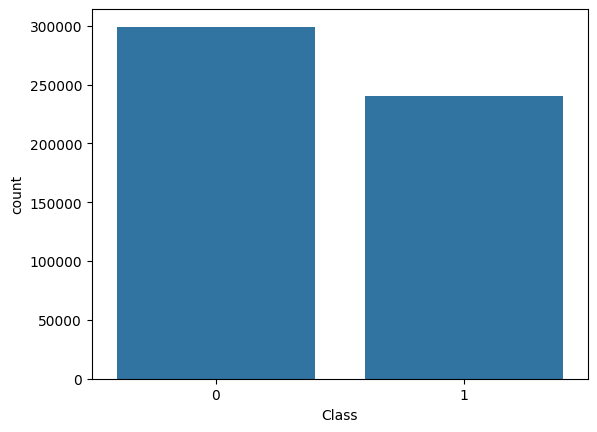

In [23]:
# Análise se a base está equilibrada com o número de atrasos e não atrasos:
sns.countplot(x='Class', data=df)

# Mostra desbalanceamento de classes

**Pré-processamento da base**

Para utilizar a companhia area dentro do modelo, vamos realizar a transformação de label enconding nos dados

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df['AirportFrom']=LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo']=LabelEncoder().fit_transform(df['AirportTo'])

In [26]:
df['Airline']=LabelEncoder().fit_transform(df['Airline'])

In [27]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0


**Separando a base de dados**

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
# Separação das bases
x = df[['Flight', 'Time', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df['Class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

**Criando modelo de Naive Bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
# Predizendo valores
y_pred = gnb.predict(x_test)

Validando modelo

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# Modelo acertou 60% da base treinada
# De modo geral, o modelo não obteve um poder preditivo grande

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.59


Equilibrando a base de dados

In [41]:
from sklearn.utils import resample

In [42]:
# Separando as classes majoritárias e minoritárias
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

In [43]:
# Upsampling da classe minoritária
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=7)

In [44]:
# Juntando os dois DataFrames
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

<Axes: xlabel='Class', ylabel='count'>

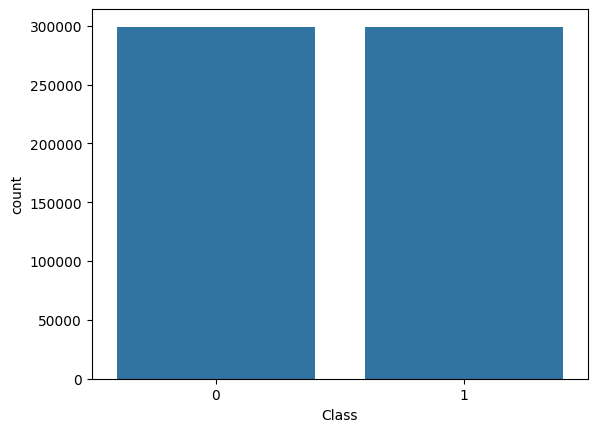

In [45]:
sns.countplot(x='Class', data=df_equilibrado)

Testando o algoritmo com a base equilibrada

In [46]:
x_equilibrado = df_equilibrado[['Flight', 'Time', 'Length', 'DayOfWeek']]
y_equilibrado = df_equilibrado['Class']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, stratify=y_equilibrado, random_state=7)

In [48]:
# Treinando o algoritmo
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

GaussianNB()

In [49]:
# Predizendo valores
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

Validando o modelo

In [51]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print("Accuracy:", round(accuracy_equilibrado, 2))

Accuracy: 0.57


Testando com Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)

In [56]:
# Instancia o modelo Random Forest e define os hiperparâmetros
rf = RandomForestClassifier(random_state=7)

In [57]:
# Treina o modelo com o conjunto de treinamento
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [58]:
# Faz previsões no conjunto de teste
y_pred_rf = rf.predict(x_test)

Validando o modelo

In [59]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_equilibrado_rf, 2))

Accuracy: 0.69
